# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [4]:
data = pd.read_csv('C:/Users/rfm_classification.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Amount        4372 non-null   float64
 1   Frequency     4372 non-null   float64
 2   Recency       4372 non-null   float64
 3   Freq_Country  4372 non-null   float64
 4   Cluster       4372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 170.9 KB


,Amount,Frequency,Recency,Freq_Country,Cluster
0,-0.999609,-0.970596,2.382836,0.326835,2
1,2.208240,1.594564,-0.901414,-3.101285,0
2,0.606644,-0.557320,-0.159153,-3.096423,0
3,0.571172,0.041217,-0.738727,-3.095399,0
4,-0.700745,-0.756832,2.230316,-3.092717,0


In [6]:
data.isnull().sum() 

Amount          0
Frequency       0
Recency         0
Freq_Country    0
Cluster         0
dtype: int64

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [8]:

# Fitur (X) dan target (y)
X = data[['Amount', 'Frequency','Recency', 'Freq_Country']]  
y = data['Cluster']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # stratify=y agar rata nilai min dan positifnya

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

In [ ]:
# Memilih model yang umum dipakai yaitu KNN dan gradient boosting, dengan prediksi adalah cluster (y)
# berdasarkan fitur 'Amount','Frequency','Recency', 'Freq_Country' 


In [10]:
# Inisiasi model
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}
# Hashmap menyimpan hasil latih
trained_models = {}
for model_name, model in models.items():
    print(f"Latih model: {model_name}")
    model.fit(X_train, y_train)
    trained_models[model_name] = model 

Latih model: K-Nearest Neighbors
Latih model: Gradient Boosting


## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Model evaluasi: K-Nearest Neighbors


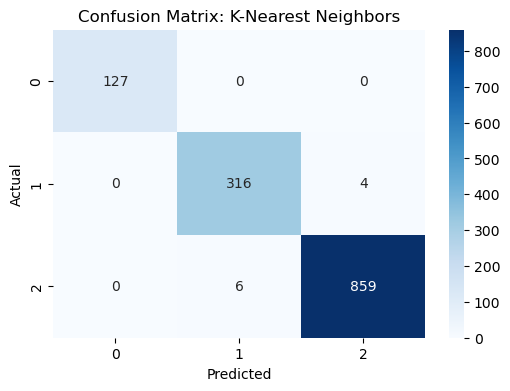

Accuracy: 99.24%
F1-Score: 99.24%
Precision: 99.24%
Recall: 99.24%
Model evaluasi: Gradient Boosting


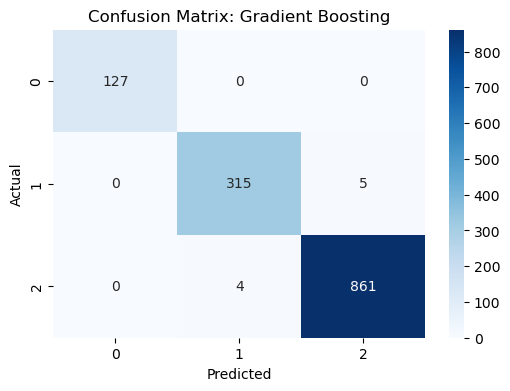

Accuracy: 99.31%
F1-Score: 99.31%
Precision: 99.31%
Recall: 99.31%


In [12]:
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Dictionary untuk menyimpan hasil evaluasi
results = {}

# Loop untuk melatih dan mengevaluasi setiap model
for model_name, model in trained_models.items():
    print(f"Model evaluasi: {model_name}")
    # Prediksi pada data uji
    y_pred = model.predict(X_test)
    
    # Evaluasi performa
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Gunakan 'weighted' untuk menangani data tidak seimbang
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    # Simpan hasil evaluasi
    results[model_name] = {
        "Accuracy": accuracy,
        "F1-Score": f1,
        "Precision": precision,
        "Recall": recall
    }
        # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    # Print hasil evaluasi dalam persen
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"F1-Score: {f1 * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

Berdasarkan algoritma yang dipakai, dapat disimpulkan bahwa parameter standar sudah cukup dalam memprediksi data sesuai dengan clusternya. Gradient Boosting memiliki performa lebih baik secara umum.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

In [14]:
# Evaluasi performa pada training set dan testing set
for model_name, model in trained_models.items():
    print(f"\n=== Evaluating model: {model_name} ===")
    
    # Prediksi pada training set
    y_train_pred = model.predict(X_train)
    
    # Prediksi pada testing set
    y_test_pred = model.predict(X_test)
    
    # Evaluasi training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    
    # Evaluasi testing set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    # Print hasil evaluasi
    print(f"Training Accuracy: {train_accuracy * 100:.2f}")
    print(f"Training F1-Score: {train_f1 * 100:.2f}")
    print(f"Testing Accuracy: {test_accuracy* 100:.2f}")
    print(f"Testing F1-Score: {test_f1* 100:.2f}")



=== Evaluating model: K-Nearest Neighbors ===
Training Accuracy: 99.44
Training F1-Score: 99.44
Testing Accuracy: 99.24
Testing F1-Score: 99.24

=== Evaluating model: Gradient Boosting ===
Training Accuracy: 100.00
Training F1-Score: 100.00
Testing Accuracy: 99.31
Testing F1-Score: 99.31


Berdasarkan data, dapat disimpulkan bahwa kedua model sudah bagus dalam memprediksi cluster, dengan gradien boosting yang memiliki peforma lebih baik. Kedua model ini dapat digunakan untuk memprediksi suatu customer masuk di mana berdasarkan nilai RFM dan country-nya.